# Test python code against original fortran90 code

In [6]:
from anaigm_inoue14 import read_inoue14_IGMcoeff, tLSDLA, tLSLAF, tLCDLA, tLCLAF, igm_transmission_inoue
import numpy as np
import matplotlib.pyplot as plt

## Read IGM transmission curves from z=1 to 7 ('test' file from ANAigm original version)

In [7]:
data = np.loadtxt("test")
# data[:,0] : restframe wavelengths in A 
# data[:,iz] : Tigm at z=1,2,3,4,5,6,7 (iz starts at 1)

## Compute IGM transmission curves with python version 

### Read IGM coefficients from Inoue+14 model

In [8]:
inputpath='/Users/thibaultgarel/Work/UVEX/predictions/IGM_transmission/ANAIGM_Jul13_2020/'
lam1, ALAF, ADLA = read_inoue14_IGMcoeff(inputpath)

In [9]:
z_source    = np.arange(1.,8.,1.)       # redshift from 1 to 7
lambda_rest = np.arange(100.,1400.,1)   # restframe wavelengths from 100 to 1400 A
tigm        = np.zeros((len(lambda_rest),len(z_source))) # IGM transmission array

for jz,zs in enumerate(z_source):
    print('z = ',zs)
    lambda_obs = lambda_rest * (1.+zs)
    for i,lobs in enumerate(lambda_obs):
        tigm[i,jz] = igm_transmission_inoue(zs, lobs, lam1, ALAF, ADLA)
        print(lobs,lambda_rest[i],tigm[i,jz])

z =  1.0
200.0 100.0 0.7487139682897057
202.0 101.0 0.7471266790875811
204.0 102.0 0.7455609303760369
206.0 103.0 0.744016231342812
208.0 104.0 0.7424921078895086
210.0 105.0 0.7409881019047049
212.0 106.0 0.7395037705753738
214.0 107.0 0.738038685734241
216.0 108.0 0.7365924332408892
218.0 109.0 0.7351646123945634
220.0 110.0 0.733754835376778
222.0 111.0 0.732362726721952
224.0 112.0 0.7309879228144238
226.0 113.0 0.7296300714103051
228.0 114.0 0.7282888311827368
230.0 115.0 0.7269638712892043
232.0 116.0 0.7256548709596616
234.0 117.0 0.7243615191042881
236.0 118.0 0.7230835139397828
238.0 119.0 0.7218205626331706
240.0 120.0 0.7205723809621564
242.0 121.0 0.7193386929911284
244.0 122.0 0.7181192307619634
246.0 123.0 0.7169137339988431
248.0 124.0 0.7157219498263357
250.0 125.0 0.7145436325000452
252.0 126.0 0.7133785431491686
254.0 127.0 0.71222644953035
256.0 128.0 0.7110871257922405
258.0 129.0 0.7099603522502294
260.0 130.0 0.70884591517082
262.0 131.0 0.7077436065651748
264.0 1

### Comparison plot of Tigm vs restframe wavelength

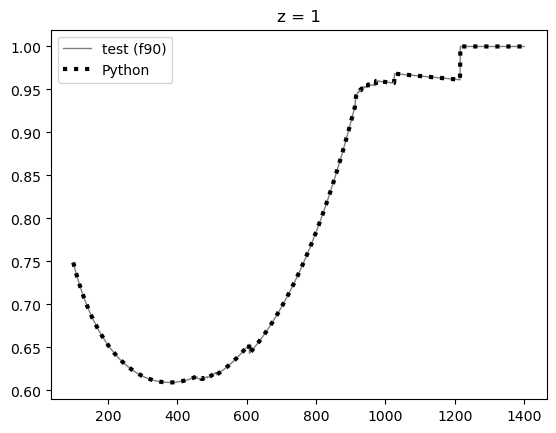

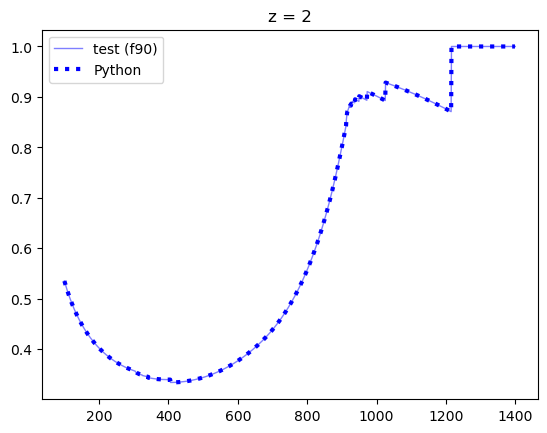

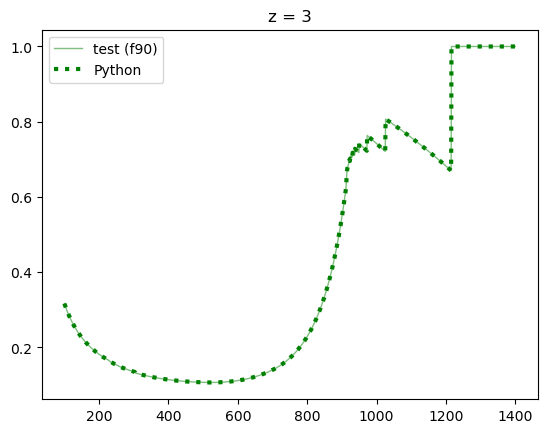

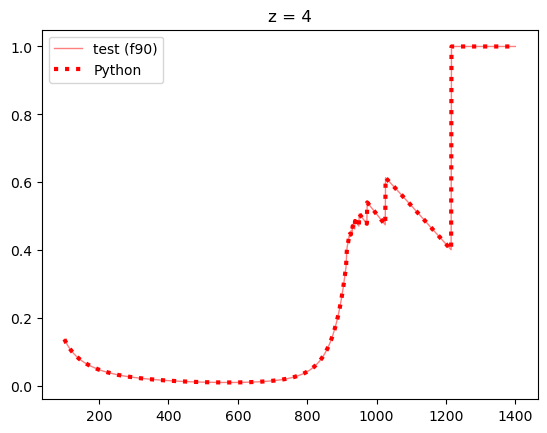

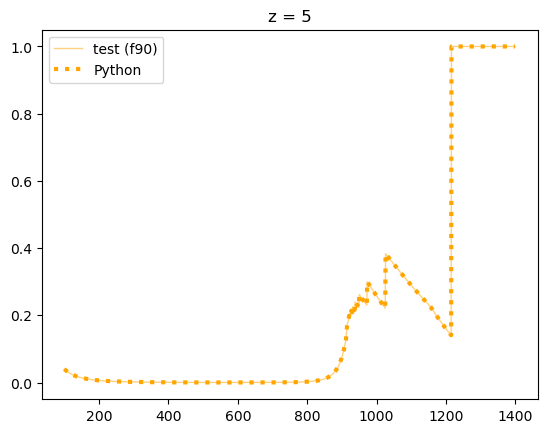

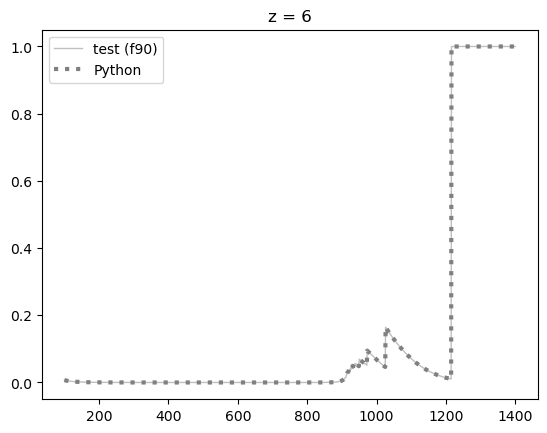

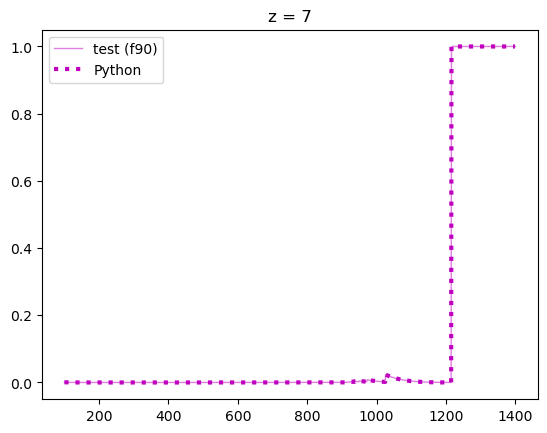

In [10]:
cols = ['k','b','g','r','orange','grey','m']
for i in range(7):
    plt.figure()
    # Plot 'test' IGM tranmission curves
    plt.plot(data[:,0],data[:,i+1],label='test (f90)',color=cols[i],alpha=0.5,lw=1)
    # Plot python-computed IGM tranmission curves
    plt.plot(lambda_rest,tigm[:,i],label='Python',color=cols[i],linestyle=':',lw=3)   
    plt.title('z = %i'%(i+1))
    plt.legend(loc=2)
    plt.show()